In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv('./OnlineNewsPopularity.csv')
news_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


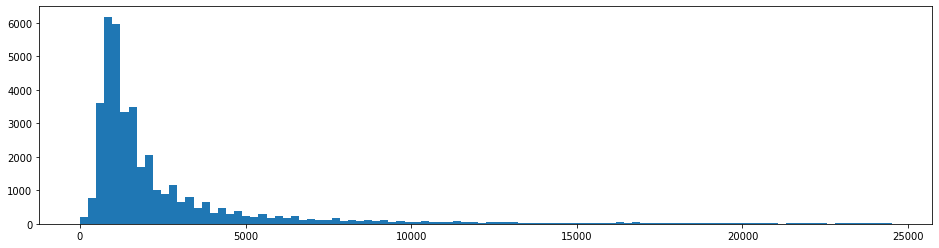

(39053, 1)

In [2]:
#Usuwanie wartości odstających
def reject_outliers(shares):
    u = np.median(news_data[' shares'])
    s = np.std(news_data[' shares'])
    filtered= [e for e in (news_data[' shares']) if (u - 2 * s < e < u + 2 * s)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

filtered = reject_outliers('shares')
plt.hist(filtered, 100)
fig_size[0]=16.0
fig_size[1]=8.0
plt.show()

news_data_shares = pd.DataFrame(filtered)
news_data_shares.shape


In [3]:
#Tworzenie nowych danych bez wartości odstających.
#Definiujemy wartość odstającą jako wartość atrybutu „shares”, która jest poza dwoma standardowymi odchyleniami
#(= 3395 + (2 x 11627) = 26649)
fixedData = news_data[news_data[' shares']<26647]

In [4]:
#USTALENIE DANYCH WEJŚCIOWYCH I TARGETU
data = fixedData.iloc[1:,2:-1]
target = fixedData.iloc[1:,-1]
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286


In [5]:
target.head()

1     711
2    1500
3    1200
4     505
5     855
Name:  shares, dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler #Standaryzacja danych
scaler = MinMaxScaler() 
data   = scaler.fit_transform(data)
data

array([[3.33333333e-01, 3.00920463e-02, 8.62686278e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 2.48996932e-02, 8.20441556e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 6.26622610e-02, 7.18670296e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.80952381e-01, 5.21595468e-02, 7.36597916e-04, ...,
        5.68181818e-01, 9.09090909e-02, 1.36363636e-01],
       [1.90476190e-01, 8.04814727e-02, 7.69605268e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.80952381e-01, 1.85272599e-02, 1.00140763e-03, ...,
        6.25000000e-01, 3.33333333e-01, 2.50000000e-01]])

In [9]:
#Siec neuronowa z metodą PCA redukcji wymiarowości
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=40) #Metoda PCA
pca_data = pca.fit(data).transform(data)
pca_data

array([[-2.70094081e-01,  5.01763511e-02,  1.25571265e+00, ...,
         2.43600217e-02, -1.02652169e-02, -6.59851345e-04],
       [-3.43564821e-01,  3.59062421e-01,  7.73363301e-01, ...,
         1.40905886e-02, -3.66278381e-02, -6.55350106e-02],
       [ 4.18502687e-02, -3.73549896e-01, -2.23127602e-01, ...,
        -2.54338673e-02,  5.41945322e-04, -5.60512854e-03],
       ...,
       [-2.39187021e-01, -3.39720530e-01, -1.63448832e-01, ...,
         3.57177383e-03, -5.72795139e-03,  3.06800784e-02],
       [ 1.28288484e+00,  7.63523484e-02,  1.61147576e-01, ...,
         1.32208633e-02,  5.19957462e-04, -7.08313159e-03],
       [-4.55926505e-01, -6.88475344e-01, -3.27536339e-01, ...,
        -3.17496875e-02,  3.86182576e-02,  4.93839311e-02]])

In [10]:
#DZIELENIE DANYCH NA MODELE UCZĄCE I TESTOWE

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(pca_data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (35216, 40)
target_train: (35216,)

Testing dataset:
data_test: (3913, 40)
target_test: (3913,)


In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

news_network = MLPRegressor(solver='adam', alpha=1e-5, 
                     hidden_layer_sizes=(50,50 ),verbose=True, random_state=1, max_iter=5000, tol=1e-7)
news_network.fit(data_train, target_train)

mse =  mean_squared_error(target_test, news_network.predict(data_test))
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Iteration 1, loss = 9022748.53163065
Iteration 2, loss = 8478252.60695073
Iteration 3, loss = 6993648.79507924
Iteration 4, loss = 5744595.67699423
Iteration 5, loss = 5424420.04668660
Iteration 6, loss = 5384640.71989979
Iteration 7, loss = 5375729.82356498
Iteration 8, loss = 5371497.70821587
Iteration 9, loss = 5368670.46887498
Iteration 10, loss = 5366837.28453318
Iteration 11, loss = 5364906.03483336
Iteration 12, loss = 5363955.45847737
Iteration 13, loss = 5362283.98432165
Iteration 14, loss = 5361017.73901257
Iteration 15, loss = 5359930.55954553
Iteration 16, loss = 5358829.77847734
Iteration 17, loss = 5357822.99693939
Iteration 18, loss = 5356784.57702443
Iteration 19, loss = 5356550.10566564
Iteration 20, loss = 5354925.63570097
Iteration 21, loss = 5354241.31239558
Iteration 22, loss = 5353030.35402905
Iteration 23, loss = 5352274.10003256
Iteration 24, loss = 5351523.21506771
Iteration 25, loss = 5350694.90696365
Iteration 26, loss = 5349906.17153305
Iteration 27, loss = 

Iteration 214, loss = 5182415.64825938
Iteration 215, loss = 5182327.74135316
Iteration 216, loss = 5181915.99775090
Iteration 217, loss = 5180596.03169012
Iteration 218, loss = 5179941.99799938
Iteration 219, loss = 5178479.24672520
Iteration 220, loss = 5177903.87413960
Iteration 221, loss = 5177561.76550051
Iteration 222, loss = 5176365.63969743
Iteration 223, loss = 5174949.21529712
Iteration 224, loss = 5175730.43087476
Iteration 225, loss = 5174113.55241572
Iteration 226, loss = 5173038.94888981
Iteration 227, loss = 5172276.36139326
Iteration 228, loss = 5171217.23658819
Iteration 229, loss = 5170943.99068448
Iteration 230, loss = 5170076.24616205
Iteration 231, loss = 5168890.99584130
Iteration 232, loss = 5169226.32784454
Iteration 233, loss = 5167051.85060544
Iteration 234, loss = 5166194.25100039
Iteration 235, loss = 5165617.80530937
Iteration 236, loss = 5164665.80655864
Iteration 237, loss = 5163270.70806828
Iteration 238, loss = 5162938.13191849
Iteration 239, loss = 516

Iteration 425, loss = 4983022.83226294
Iteration 426, loss = 4981589.73805707
Iteration 427, loss = 4979352.78535092
Iteration 428, loss = 4980285.15400740
Iteration 429, loss = 4977969.45550250
Iteration 430, loss = 4977416.41491070
Iteration 431, loss = 4977152.64858516
Iteration 432, loss = 4975676.24907676
Iteration 433, loss = 4974451.64673870
Iteration 434, loss = 4974845.47287444
Iteration 435, loss = 4971821.38743873
Iteration 436, loss = 4971866.99556146
Iteration 437, loss = 4970901.86019399
Iteration 438, loss = 4970672.07187466
Iteration 439, loss = 4968896.52071448
Iteration 440, loss = 4968372.17487078
Iteration 441, loss = 4967675.75408698
Iteration 442, loss = 4967355.60203253
Iteration 443, loss = 4965453.26218852
Iteration 444, loss = 4965320.67759480
Iteration 445, loss = 4964049.97711227
Iteration 446, loss = 4962389.42651718
Iteration 447, loss = 4962461.61839263
Iteration 448, loss = 4961532.79783681
Iteration 449, loss = 4959614.56895119
Iteration 450, loss = 495

Iteration 636, loss = 4830116.51891027
Iteration 637, loss = 4830393.60288542
Iteration 638, loss = 4829805.77345203
Iteration 639, loss = 4827602.83174141
Iteration 640, loss = 4827483.34401672
Iteration 641, loss = 4828235.41164780
Iteration 642, loss = 4827719.19203824
Iteration 643, loss = 4825498.00299814
Iteration 644, loss = 4825663.22955213
Iteration 645, loss = 4825418.39558127
Iteration 646, loss = 4824431.88210824
Iteration 647, loss = 4825864.08130166
Iteration 648, loss = 4823631.80285470
Iteration 649, loss = 4821522.56557286
Iteration 650, loss = 4822538.92381164
Iteration 651, loss = 4822023.72095983
Iteration 652, loss = 4820826.27428759
Iteration 653, loss = 4820834.10825141
Iteration 654, loss = 4819905.53291887
Iteration 655, loss = 4819095.57447762
Iteration 656, loss = 4818736.29837824
Iteration 657, loss = 4817314.84671433
Iteration 658, loss = 4817912.93919225
Iteration 659, loss = 4816588.92798284
Iteration 660, loss = 4817091.16004897
Iteration 661, loss = 481

Iteration 847, loss = 4723202.49044503
Iteration 848, loss = 4724982.27738938
Iteration 849, loss = 4723432.33287919
Iteration 850, loss = 4723336.57947776
Iteration 851, loss = 4722095.19953555
Iteration 852, loss = 4724379.72301423
Iteration 853, loss = 4722626.96367731
Iteration 854, loss = 4721947.70619492
Iteration 855, loss = 4719973.55152310
Iteration 856, loss = 4720272.04092164
Iteration 857, loss = 4720053.22639255
Iteration 858, loss = 4720873.93161301
Iteration 859, loss = 4718134.04205893
Iteration 860, loss = 4721058.68976497
Iteration 861, loss = 4718748.33598339
Iteration 862, loss = 4718928.63234742
Iteration 863, loss = 4718288.87134841
Iteration 864, loss = 4718594.69784137
Iteration 865, loss = 4716502.54594948
Iteration 866, loss = 4715001.83653347
Iteration 867, loss = 4717321.78248158
Iteration 868, loss = 4715139.78752507
Iteration 869, loss = 4715987.03543463
Iteration 870, loss = 4714485.82457767
Iteration 871, loss = 4714758.45535362
Iteration 872, loss = 471

Iteration 1056, loss = 4649186.13721935
Iteration 1057, loss = 4650848.76737356
Iteration 1058, loss = 4651970.55821056
Iteration 1059, loss = 4650308.20423262
Iteration 1060, loss = 4650752.15487422
Iteration 1061, loss = 4648539.24172397
Iteration 1062, loss = 4648847.29659752
Iteration 1063, loss = 4649174.51164691
Iteration 1064, loss = 4651035.81911598
Iteration 1065, loss = 4648518.64717394
Iteration 1066, loss = 4646654.31561327
Iteration 1067, loss = 4649042.15803396
Iteration 1068, loss = 4647265.39417709
Iteration 1069, loss = 4647551.35729083
Iteration 1070, loss = 4647050.34521705
Iteration 1071, loss = 4646756.49117654
Iteration 1072, loss = 4648129.19015471
Iteration 1073, loss = 4647695.29109356
Iteration 1074, loss = 4644354.64992575
Iteration 1075, loss = 4646721.46576452
Iteration 1076, loss = 4645940.46969752
Iteration 1077, loss = 4646398.37316415
Iteration 1078, loss = 4642550.86515392
Iteration 1079, loss = 4644537.90257027
Iteration 1080, loss = 4642670.93894588


Iteration 1261, loss = 4596001.49142069
Iteration 1262, loss = 4595474.53842770
Iteration 1263, loss = 4594245.47708126
Iteration 1264, loss = 4596075.32040290
Iteration 1265, loss = 4595248.40525173
Iteration 1266, loss = 4593823.56470471
Iteration 1267, loss = 4595594.05162336
Iteration 1268, loss = 4594528.99239935
Iteration 1269, loss = 4596543.74476153
Iteration 1270, loss = 4594128.37390336
Iteration 1271, loss = 4593250.72353228
Iteration 1272, loss = 4592456.14793459
Iteration 1273, loss = 4591185.23653563
Iteration 1274, loss = 4593787.50154865
Iteration 1275, loss = 4590679.03534521
Iteration 1276, loss = 4595169.54657815
Iteration 1277, loss = 4591311.78623789
Iteration 1278, loss = 4592077.18146123
Iteration 1279, loss = 4590982.60529385
Iteration 1280, loss = 4589426.87084153
Iteration 1281, loss = 4588334.26132642
Iteration 1282, loss = 4590397.00147668
Iteration 1283, loss = 4591636.59232127
Iteration 1284, loss = 4589840.02493353
Iteration 1285, loss = 4589208.24511401


Iteration 1466, loss = 4547272.05173332
Iteration 1467, loss = 4545792.28432592
Iteration 1468, loss = 4549872.21843182
Iteration 1469, loss = 4548482.66610397
Iteration 1470, loss = 4546237.34071063
Iteration 1471, loss = 4545144.60743344
Iteration 1472, loss = 4545296.39807908
Iteration 1473, loss = 4545890.57708064
Iteration 1474, loss = 4544581.21824752
Iteration 1475, loss = 4545789.38720679
Iteration 1476, loss = 4544322.66924301
Iteration 1477, loss = 4543638.64466422
Iteration 1478, loss = 4545220.26266271
Iteration 1479, loss = 4544413.28321236
Iteration 1480, loss = 4544102.97693539
Iteration 1481, loss = 4545538.87899296
Iteration 1482, loss = 4543427.48731649
Iteration 1483, loss = 4544418.63028389
Iteration 1484, loss = 4544138.78678430
Iteration 1485, loss = 4543221.88314950
Iteration 1486, loss = 4542965.61841883
Iteration 1487, loss = 4543465.24342236
Iteration 1488, loss = 4542077.08778183
Iteration 1489, loss = 4542989.56785230
Iteration 1490, loss = 4541422.59876233


In [16]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(target_test, news_network.predict(data_test)))

Variance score: 0.01


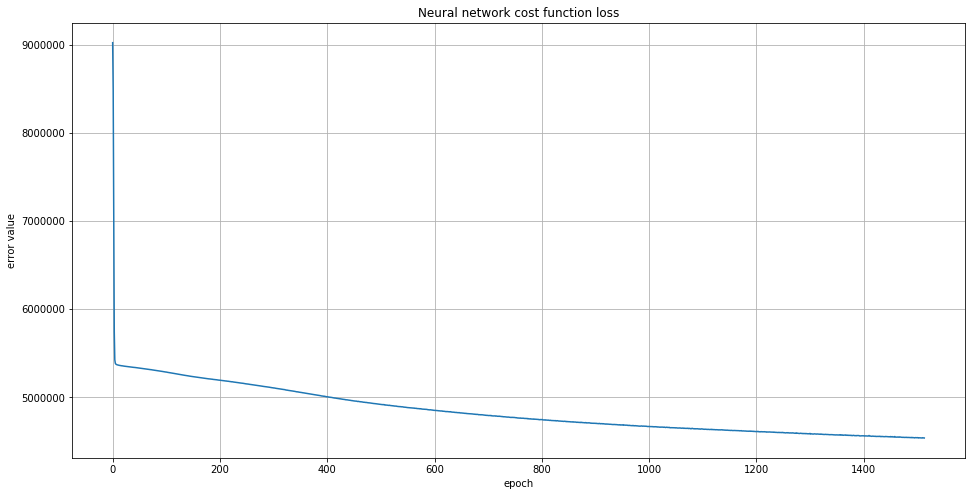

In [17]:
import matplotlib.pyplot as plt
plt.plot(news_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

Wykres predykcji


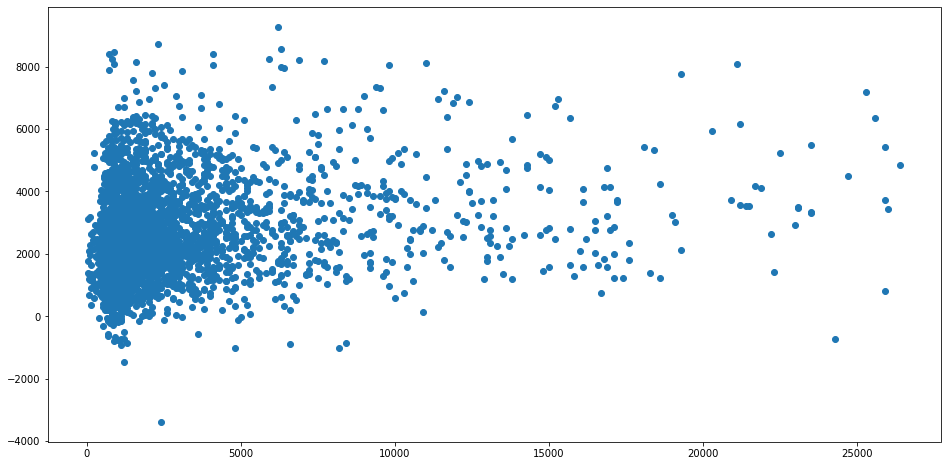

In [18]:
#WYKRES PREDYKCJI
plt.scatter(target_test, news_network.predict(data_test))
print("Wykres predykcji")


In [19]:
df_someXdata = pd.DataFrame(news_network.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(11)

,Actual shares,Predicted shares
0,1100,376.841185
1,1800,2729.473267
2,970,2907.082942
3,7200,3921.937584
4,1600,2603.290763
5,1100,3425.430980
6,1100,4589.622211
7,941,1362.470804
8,1700,2563.533022
9,1700,1531.030423


In [7]:
#---------------------------------------------------------------------------------------------------------------
#Sieć neuronowa z metodą Truncated SVD

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=40)
svd_data = svd.fit(data).transform(data)
svd_data

array([[ 2.22200275, -0.27792097,  0.07711642, ...,  0.01966763,
        -0.07904075,  0.04767526],
       [ 2.28174142, -0.3415378 ,  0.38033739, ...,  0.00731476,
        -0.12336569,  0.11496566],
       [ 2.16524074,  0.0235443 , -0.34998166, ..., -0.03017328,
        -0.07431731,  0.05844505],
       ...,
       [ 2.30514112, -0.25361135, -0.31618615, ...,  0.00287403,
        -0.01293688, -0.02199114],
       [ 2.4517828 ,  1.28336138,  0.05072502, ...,  0.01286098,
        -0.00618733,  0.01211479],
       [ 2.53575565, -0.46964096, -0.68009413, ..., -0.03018287,
         0.04172715, -0.03941738]])

In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(svd_data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (35216, 40)
target_train: (35216,)

Testing dataset:
data_test: (3913, 40)
target_test: (3913,)


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

news_network = MLPRegressor(solver='adam', alpha=1e-5, 
                     hidden_layer_sizes=(50,50 ),verbose=True, random_state=1, max_iter=5000, tol=1e-7)
news_network.fit(data_train, target_train)

mse =  mean_squared_error(target_test, news_network.predict(data_test))
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Iteration 1, loss = 8995309.05362117
Iteration 2, loss = 7863375.68937887
Iteration 3, loss = 5892578.65603181
Iteration 4, loss = 5437992.24154727
Iteration 5, loss = 5416658.73727931
Iteration 6, loss = 5407109.54179156
Iteration 7, loss = 5399735.19933599
Iteration 8, loss = 5395171.43326478
Iteration 9, loss = 5391423.69411439
Iteration 10, loss = 5388539.27346345
Iteration 11, loss = 5386947.73984464
Iteration 12, loss = 5384243.66242347
Iteration 13, loss = 5383369.88336966
Iteration 14, loss = 5381887.16886577
Iteration 15, loss = 5381306.96143533
Iteration 16, loss = 5379735.21897242
Iteration 17, loss = 5379217.66956441
Iteration 18, loss = 5378550.39181621
Iteration 19, loss = 5377339.58493318
Iteration 20, loss = 5376903.86227714
Iteration 21, loss = 5375951.62166990
Iteration 22, loss = 5375788.27640114
Iteration 23, loss = 5375256.15652386
Iteration 24, loss = 5374660.03358639
Iteration 25, loss = 5374637.15457246
Iteration 26, loss = 5373335.25583864
Iteration 27, loss = 

Iteration 214, loss = 5321736.04153727
Iteration 215, loss = 5321275.62473301
Iteration 216, loss = 5320895.95789646
Iteration 217, loss = 5320708.04342774
Iteration 218, loss = 5320503.62690917
Iteration 219, loss = 5319864.39495142
Iteration 220, loss = 5319761.55262472
Iteration 221, loss = 5319297.19078295
Iteration 222, loss = 5319296.01221897
Iteration 223, loss = 5319519.22031961
Iteration 224, loss = 5319005.06840931
Iteration 225, loss = 5318773.60194314
Iteration 226, loss = 5317788.43833386
Iteration 227, loss = 5318096.64305607
Iteration 228, loss = 5318201.38703129
Iteration 229, loss = 5317372.50181681
Iteration 230, loss = 5317026.55277260
Iteration 231, loss = 5316619.35345435
Iteration 232, loss = 5316480.64289723
Iteration 233, loss = 5316447.14927761
Iteration 234, loss = 5315814.43637660
Iteration 235, loss = 5315812.72539106
Iteration 236, loss = 5315455.24188603
Iteration 237, loss = 5315483.90300677
Iteration 238, loss = 5314729.18841372
Iteration 239, loss = 531

Iteration 425, loss = 5250356.89156140
Iteration 426, loss = 5250135.24761672
Iteration 427, loss = 5249309.31399044
Iteration 428, loss = 5249444.46151780
Iteration 429, loss = 5247919.93175880
Iteration 430, loss = 5247587.94269178
Iteration 431, loss = 5247187.69596443
Iteration 432, loss = 5246618.51295495
Iteration 433, loss = 5246362.86326629
Iteration 434, loss = 5245866.94446834
Iteration 435, loss = 5246097.91043914
Iteration 436, loss = 5244560.93326925
Iteration 437, loss = 5245074.40629925
Iteration 438, loss = 5244333.97075978
Iteration 439, loss = 5243443.21563401
Iteration 440, loss = 5242723.03166214
Iteration 441, loss = 5242232.17542444
Iteration 442, loss = 5241872.10215293
Iteration 443, loss = 5242417.16466415
Iteration 444, loss = 5241641.67923217
Iteration 445, loss = 5241179.21552236
Iteration 446, loss = 5241659.87765840
Iteration 447, loss = 5241197.44710593
Iteration 448, loss = 5239748.23893815
Iteration 449, loss = 5240597.82522806
Iteration 450, loss = 523

Iteration 636, loss = 5197406.22022692
Iteration 637, loss = 5197015.48200766
Iteration 638, loss = 5196945.83302562
Iteration 639, loss = 5195025.63933861
Iteration 640, loss = 5196678.32011317
Iteration 641, loss = 5196583.44692581
Iteration 642, loss = 5195669.76415521
Iteration 643, loss = 5195911.08557580
Iteration 644, loss = 5195396.45484598
Iteration 645, loss = 5195499.55606753
Iteration 646, loss = 5195443.10589379
Iteration 647, loss = 5195053.79313572
Iteration 648, loss = 5194651.89964172
Iteration 649, loss = 5194259.29157843
Iteration 650, loss = 5194033.90719563
Iteration 651, loss = 5194021.24677154
Iteration 652, loss = 5194585.87202628
Iteration 653, loss = 5192974.91497508
Iteration 654, loss = 5193084.60664170
Iteration 655, loss = 5193777.42307522
Iteration 656, loss = 5193416.58696775
Iteration 657, loss = 5193176.04042176
Iteration 658, loss = 5193143.02777883
Iteration 659, loss = 5193350.12261383
Iteration 660, loss = 5192170.48022749
Iteration 661, loss = 519

Iteration 847, loss = 5151676.51181551
Iteration 848, loss = 5150848.37927092
Iteration 849, loss = 5150248.02461158
Iteration 850, loss = 5149753.80670529
Iteration 851, loss = 5149665.81849430
Iteration 852, loss = 5150544.11717934
Iteration 853, loss = 5149340.79081223
Iteration 854, loss = 5149415.30922880
Iteration 855, loss = 5148894.20153417
Iteration 856, loss = 5148367.62214337
Iteration 857, loss = 5149072.04649647
Iteration 858, loss = 5148033.85256090
Iteration 859, loss = 5148184.32647474
Iteration 860, loss = 5148408.31284149
Iteration 861, loss = 5148149.96939499
Iteration 862, loss = 5146926.38717080
Iteration 863, loss = 5148340.32667242
Iteration 864, loss = 5147450.19242571
Iteration 865, loss = 5147274.28614295
Iteration 866, loss = 5146749.43648952
Iteration 867, loss = 5146750.87249377
Iteration 868, loss = 5145883.63913397
Iteration 869, loss = 5145870.41896220
Iteration 870, loss = 5145414.16136014
Iteration 871, loss = 5145007.31588541
Iteration 872, loss = 514

Iteration 1056, loss = 5083977.15187178
Iteration 1057, loss = 5083000.35759642
Iteration 1058, loss = 5081403.42220166
Iteration 1059, loss = 5081709.19870444
Iteration 1060, loss = 5081799.34936810
Iteration 1061, loss = 5082065.91568669
Iteration 1062, loss = 5080753.83154263
Iteration 1063, loss = 5080569.25822680
Iteration 1064, loss = 5081731.71080539
Iteration 1065, loss = 5081119.73965798
Iteration 1066, loss = 5079815.84017008
Iteration 1067, loss = 5080412.15980999
Iteration 1068, loss = 5078311.00524426
Iteration 1069, loss = 5080001.36067615
Iteration 1070, loss = 5078688.66128734
Iteration 1071, loss = 5076714.31963496
Iteration 1072, loss = 5076849.86497675
Iteration 1073, loss = 5075516.73533976
Iteration 1074, loss = 5077105.77012625
Iteration 1075, loss = 5077165.10689319
Iteration 1076, loss = 5077298.73619019
Iteration 1077, loss = 5075931.14442801
Iteration 1078, loss = 5075490.96708051
Iteration 1079, loss = 5076265.41657834
Iteration 1080, loss = 5075223.29312253


Iteration 1261, loss = 4994170.52990009
Iteration 1262, loss = 4995416.80251667
Iteration 1263, loss = 4996741.91874845
Iteration 1264, loss = 4993714.38722171
Iteration 1265, loss = 4993869.71873484
Iteration 1266, loss = 4995372.18632864
Iteration 1267, loss = 4990475.36675391
Iteration 1268, loss = 4991013.27220006
Iteration 1269, loss = 4995968.71155973
Iteration 1270, loss = 4992683.23591528
Iteration 1271, loss = 4990065.78155982
Iteration 1272, loss = 4990723.11402300
Iteration 1273, loss = 4991182.37720915
Iteration 1274, loss = 4990741.83851592
Iteration 1275, loss = 4988174.38229883
Iteration 1276, loss = 4987731.54443160
Iteration 1277, loss = 4989823.44743252
Iteration 1278, loss = 4988039.43598524
Iteration 1279, loss = 4985181.25726369
Iteration 1280, loss = 4990111.64680969
Iteration 1281, loss = 4988234.24046375
Iteration 1282, loss = 4985569.93112539
Iteration 1283, loss = 4986159.22012454
Iteration 1284, loss = 4984590.56295219
Iteration 1285, loss = 4986212.66019237


Iteration 1466, loss = 4899003.30235974
Iteration 1467, loss = 4901079.65362618
Iteration 1468, loss = 4899798.69471695
Iteration 1469, loss = 4899336.32769791
Iteration 1470, loss = 4900848.74395453
Iteration 1471, loss = 4898552.33956067
Iteration 1472, loss = 4898880.83725153
Iteration 1473, loss = 4896308.60091458
Iteration 1474, loss = 4895461.68495670
Iteration 1475, loss = 4896353.25356134
Iteration 1476, loss = 4894514.15913289
Iteration 1477, loss = 4896109.50784690
Iteration 1478, loss = 4895410.11198335
Iteration 1479, loss = 4895191.86025497
Iteration 1480, loss = 4896355.01102005
Iteration 1481, loss = 4893016.45378428
Iteration 1482, loss = 4893611.07389773
Iteration 1483, loss = 4892177.37703984
Iteration 1484, loss = 4890921.79854166
Iteration 1485, loss = 4893914.36906096
Iteration 1486, loss = 4893226.32307968
Iteration 1487, loss = 4892327.01091573
Iteration 1488, loss = 4888539.64852552
Iteration 1489, loss = 4894625.07861423
Iteration 1490, loss = 4889250.78266967


In [11]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(target_test, news_network.predict(data_test)))

Variance score: 0.03


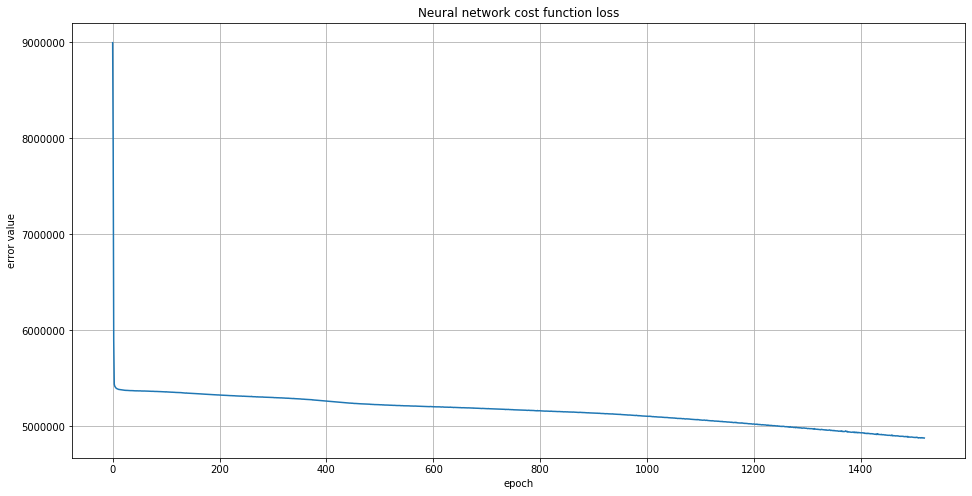

In [12]:
import matplotlib.pyplot as plt
plt.plot(news_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

Wykres predykcji


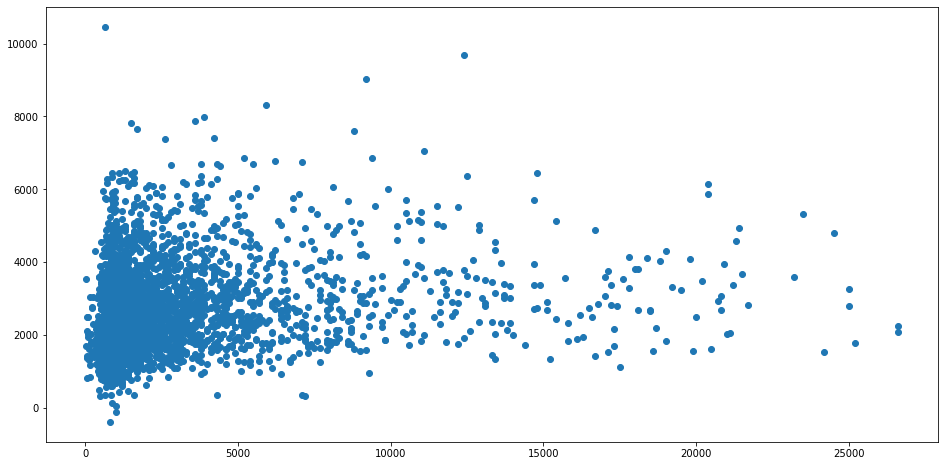

In [13]:
#WYKRES PREDYKCJI
plt.scatter(target_test, news_network.predict(data_test))
print("Wykres predykcji")


In [14]:
df_someXdata = pd.DataFrame(news_network.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(11)

,Actual shares,Predicted shares
0,1100,1939.636824
1,4900,1632.756776
2,3500,3027.793036
3,2400,3381.059583
4,1400,1801.367349
5,1900,2804.069379
6,2000,2198.640666
7,3700,2703.610558
8,2000,2660.610101
9,1900,3929.830667
